<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>
<div style="float:right;"><h2>00. Introduction and Setup</h2></div>

## Tutorial Overview

The tutorial is broken into several sections, which are each presented in their own notebook:

1.  [Basic Plotting](01%20-%20Basic%20Plotting.ipynb)
2.  [Styling and Theming](02%20-%20Styling%20and%20Theming.ipynb)
3.  [Data Sources and Transformations](03%20-%20Data%20Sources%20and%20Transformations.ipynb)
4.  [Adding Annotations](04%20-%20Adding%20Annotations.ipynb)
5.  [Presentation and Layouts](05%20-%20Presentation%20Layouts.ipynb)
6.  [Linking and Interactions](06%20-%20Linking%20and%20Interactions.ipynb)
7.  [Bar and Categorical Data Plots](07%20-%20Bar%20and%20Categorical%20Data%20Plots.ipynb)
8.  [Graph and Network Plots](08%20-%20Graph%20and%20Network%20Plots.ipynb)
9.  [Geographic Plots](09%20-%20Geographic%20Plots.ipynb)
10. [Exporting and Embedding](10%20-%20Exporting%20and%20Embedding.ipynb)
11. [Running Bokeh Applications](11%20-%20Running%20Bokeh%20Applications.ipynb)

As well as some extra topic appendices:

A1. [Models and Primitives](A1%20-%20Models%20and%20Primitives.ipynb)<br />
A2. [Visualizing Big Data with Datashader](A2%20-%20Visualizing%20Big%20Data%20with%20Datashader.ipynb)<br />
A3. [High-Level Charting with Holoviews](A3%20-%20High-Level%20Charting%20with%20Holoviews.ipynb)<br />
A4. [Additional Resources](A4%20-%20Additional%20Resources.ipynb)

## What is Bokeh

Bokeh is an interactive visualization library that targets modern web browsers for presentation. It is good for:

* Interactive visualization in modern browsers
* Standalone HTML documents, or server-backed apps
* Expressive and versatile graphics
* Large, dynamic or streaming data
* Easy usage from python (or Scala, or R, or...)

And most importantly:

## <center><i>NO JAVASCRIPT REQUIRED</i></center>

The goal of Bokeh is to provide elegant, concise construction of novel graphics in the style of D3.js, from the comfort of high level languages such as Python, and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications.

## What can I *do* with Bokeh

In [1]:
# Standard imports 

from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
# Plot a complex chart with intearctive hover in a few lines of code

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)

In [3]:
# Create and deploy interactive data applications

from IPython.display import IFrame
IFrame('https://demo.bokeh.org/sliders', width=900, height=500)

# Getting set up

In [4]:
from IPython.core.display import Markdown
Markdown(open("README.md").read())

FileNotFoundError: [Errno 2] No such file or directory: 'README.md'

### Setup-test, run the next cell. Hopefully you should see output that looks something like this:

    IPython - 6.4.0
    Pandas - 0.23.1
    Bokeh - 0.13.0
    
If this isn't working for you, see the [`README.md`](README.md) in this directory.

<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>01. Basic Plotting</h2></div>

This section of the tutorial covers the [`bokeh.plotting`](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) 
interface. This interface is a "mid-level" interface, and the main idea can be described by the statement:

**Starting from simple default figures (with sensible default tools, grids and axes), add markers and other shapes whose visual attributes are tied to directly data.**

We will see that it is possible to customize and change all of the defaults, but having them means that it is possible to get up and running very quickly. 

# Imports and Setup

When using the [`bokeh.plotting`](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) interface, there are a few common imports:
* Use the [`figure`](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure) function to  create new plot objects to work with. 
* Call the functions [`output_file`](http://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.output_file) or [`output_notebook`](http://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.output_notebook) (possibly in combination) to tell Bokeh how to display or save output. 
* Execute [`show`](http://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.show) and  [`save`](http://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.save) to display or save plots and layouts.

In [5]:
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In this case, we are in the Jupyter notebook, so we will call `output_notebook()` below. We only need to call this once, and all subsequent calls to `show()` will display inline in the notebook.

In [6]:
output_notebook()

Loading BokehJS ...

If everything is working, you should see a Bokeh logo and a message like *"BokehJS 0.13.0 successfully loaded"* as the output. 

# Scatter Plots

Bokeh can draw many types of visual shapes (called *glyphs*), include lines, bars, patches, hex tiles and more. One of the most common visualization tasks is to draw a scatter plot of data using small *marker* glyphs to represent each point. 

In this section you will see how to use Bokeh's various marker glyphsto create simple scatter plots. 

The basic outline is:
* create a blank figure: `p = figure(...)`
* call a glyph method such as `p.circle` on the figure
* `show` the figure

Execute the cell below to create a small scatter plot with circle glyphs:

In [7]:
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results

In the output above, you can see the effect of the different options for `line_color`, `fill_alpha`, etc. Try changing some of these values and re-executing the cell to update the plot.

All Bokeh scatter markers accept `size` (measured in screen space units) as a property. Circles in particular also have `radius` (measured in "data" space units). 

In [9]:
# EXERCISE: Try changing the example above to set a `radius` value instead of `size`
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], radius=1, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results

To scatter square markers instead of circles, you can use the `square` method on figures. 

In [10]:
# create a new plot using figure
p = figure(plot_width=400, plot_height=400)

# add a square renderer with a size, color, alpha, and sizes
p.square([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=[10, 15, 20, 25, 30], color="firebrick", alpha=0.6)

show(p) # show the results

Note that in the example above, we are also specifying different sizes for each individual marker. ***In general, all of a glyph's properties can be "vectorized" in this fashion. ***  Also note that we have passed ``color`` as a shorthand to set both the line and fill colors easily at the same time. This is a convenience specific to ``bokeh.plotting``.

There are many marker types available in Bokeh, you can see details and
example plots for all of them in the reference guide by clicking on entries in the list below:

* [asterisk()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.asterisk)
* [cricle()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle)
* [cirle_cross()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle_cross)
* [cirle_x()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle_x)
* [cross()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.cross)
* [diamond](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.diamond)
* [diamond_cross](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.diamond_cross)
* [hex](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.hex)
* [inverted_triangle()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.inverted_triangle)
* [square()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square)
* [square_cross()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square_cross)
* [square_x()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square_x)
* [triangle()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.triangle)
* [x()](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.x)

In [11]:
# EXERCISE: Make a scatter plot using the "autompg" dataset

from bokeh.sampledata.autompg import autompg as df # run df.head() to inspect 

df.head()

# create a new plot using figure
p = figure(plot_width=400, plot_height=400)

# add a square renderer with a size, color, alpha, and sizes
p.circle(df["mpg"], df["accel"], color="blue", alpha=0.6)

show(p) # show the results

# Line Plots

Another common visualization task is the drawing of line plots. This can be accomplished in Bokeh by calling the `p.line(...)` glyph method as shown below.

In [12]:
# create a new plot (with a title) using figure
p = figure(plot_width=400, plot_height=400, title="My Line Plot")

# add a line renderer
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2, line_dash="dashed")

show(p) # show the results

In addition to `line_width`, there are other options such as `line_color` or `line_dash` that can be set. Try setting some of the [other properties of line](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.line) and re-running the cell above.

### Datetime axes

It's often the case that timeseries data is represented by drawing lines. Let's look at an example using the "glucose" data set, which is available in a Pandas dataframe:

In [14]:
import bokeh

bokeh.sampledata.download()
from bokeh.sampledata.glucose import data
data.head()

Creating /home/jupyter-albert.yumol@gmail-e7c4e/.bokeh directory
Creating /home/jupyter-albert.yumol@gmail-e7c4e/.bokeh/data directory
Using data directory: /home/jupyter-albert.yumol@gmail-e7c4e/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Dow

isig  glucose
datetime                           
2010-03-24 09:51:00  22.59      258
2010-03-24 09:56:00  22.52      260
2010-03-24 10:01:00  22.23      258
2010-03-24 10:06:00  21.56      254
2010-03-24 10:11:00  20.79      246

We'd like to plot a subset of this data, and have a nice datetime axis as well. We can ask Bokeh for a datetime axis by passing `x_axis_type="datetime"` to the call to `figure`. This is shown below, as well as configuration of some other options such as plot dimensions, axis titles, and grid line properies. 

In [15]:
# reduce data size to one week
week = data.loc['2010-10-01':'2010-10-08']

p = figure(x_axis_type="datetime", title="Glucose Range", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'

p.line(week.index, week.glucose)

show(p)

In [16]:
# EXERCISE: Look at the AAPL data from bokeh.sampledata.stocks and create a line plot using it
from bokeh.sampledata.stocks import AAPL

# AAPL.keys()
# dict_keys(['date', 'open', 'high', 'low', 'close', 'volume', 'adj_close'])

dates = np.array(AAPL['date'], dtype=np.datetime64) # convert date strings to real datetimes
price = np.array(AAPL['adj_close'], dtype=np.int16)

p = figure(x_axis_type="datetime", title="AAPL", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = 'Price'

p.line(dates, price)

show(p)

## Hex Tiling

Bokeh supports drawing low level hex tilings using [axial coordinates](https://www.redblobgames.com/grids/hexagons/#coordinates-axial) and the `hex_tile` method, as described in the [Hex Tiles](https://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) section of the User's Guide.  However, one of the most common uses of hex tilings is to visualize binning. Bokeh encapsulates this common operation in the `hexbin` function, whose output can be passed directly to `hex_tile` as seen below.

In [17]:
from bokeh.palettes import Viridis256
from bokeh.util.hex import hexbin

n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

bins = hexbin(x, y, 0.1)

# color map the bins by hand, will see how to use linear_cmap later
color = [Viridis256[int(i)] for i in bins.counts/max(bins.counts)*255]

# match_aspect ensures neither dimension is squished, regardless of the plot size
p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

p.hex_tile(bins.q, bins.r, size=0.1, line_color=None, fill_color=color)

show(p)

In [27]:
# Exercise: Experiment with the size parameter to hexbin, and using different data as input


# Images

Another common task is to display images, which might represent heat maps, or sensor data of some sort. Bokeh provides two glyph methods for displaying images:

* `image` which can be used, together with a palette, to show colormapped 2d data in a plot
* `image_rgba` which can be used to display raw RGBA pixel data in a plot. 

The first example below shows how to call `image` with a 2d array and a palette

In [18]:
N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)

img = np.sin(xx)*np.cos(yy)

p = figure(x_range=(0, 10), y_range=(0, 10))

# must give a vector of image data for image parameter
p.image(image=[img], x=0, y=0, dw=10, dh=10, palette="Spectral11")

show(p)  

A palette can be any list of colors, or one of the named built-in palettes, which can be seen in the [bokeh.palettes reference guide](https://bokeh.pydata.org/en/latest/docs/reference/palettes.html). Try changing the palette, or the array data and re-running the cell above.

The next example shows how to use the `image_rgba` method to display raw RGBA data (created with help from NumPy). 

In [19]:
from __future__ import division
import numpy as np
 
N = 20
img = np.empty((N,N), dtype=np.uint32) 

# use an array view to set each RGBA channel individiually
view = img.view(dtype=np.uint8).reshape((N, N, 4))
for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(i/N*255) # red
        view[i, j, 1] = 158          # green
        view[i, j, 2] = int(j/N*255) # blue
        view[i, j, 3] = 255          # alpha
        
# create a new plot (with a fixed range) using figure
p = figure(x_range=[0,10], y_range=[0,10])

# add an RGBA image renderer
p.image_rgba(image=[img], x=[0], y=[0], dw=[10], dh=[10])

show(p) 

Try changing the RGBA data and re-running the cell above.

# Other Kinds of Glyphs

Bokeh supports many other kinds of glyphs. You can click on the User Guide links below to see how to create plots with these glyphs using the [`bokeh.plotting`](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) interface.

* [Rectangles and Ovals](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html#rectangles-and-ovals)
* [Segments and Rays](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html#segments-and-rays)
* [Wedges and Arcs](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html#wedges-and-arcs)
* [Specialized Curves](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html#specialized-curves)

We will cover various kinds of Bar plots (e.g. with stacking and grouping) using [Vertical and Horizontal Bars](https://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html#bars) much more extensively in the [Bar and Categorical Data Plots](07%20-%20Bar%20and%20Categorical%20Data%20Plots.ipynb) chapter of this tutorial.

In [20]:
# EXERCISE: Plot some of the other glyph types, following the examples in the User Guide. 

import numpy as np

from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.util.hex import axial_to_cartesian

output_file("hex_coords.html")

q = np.array([0,  0, 0, -1, -1,  1, 1])
r = np.array([0, -1, 1,  0,  1, -1, 0])

p = figure(plot_width=400, plot_height=400, toolbar_location=None)
p.grid.visible = False

p.hex_tile(q, r, size=1, fill_color=["firebrick"]*3 + ["navy"]*4,
           line_color="white", alpha=0.5)

x, y = axial_to_cartesian(q, r, 1, "pointytop")

p.text(x, y, text=["(%d, %d)" % (q,r) for (q, r) in zip(q, r)],
       text_baseline="middle", text_align="center")

show(p)


# Plots with Multiple Glyphs 

Finally, it should be noted that is possible to combine more than one glyph on a single figure. When multiple calls to glyph methods happen on a single figure, the glyphs are draw in the order called, as shown below.

In [21]:
# set up some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 7, 3]

# create a new plot with figure
p = figure(plot_width=400, plot_height=400)

# add both a line and circles on the same plot
p.line(x, y, line_width=2)
p.circle(x, y, fill_color="white", size=8)

show(p) # show the results

In [17]:
# EXERCISE: create your own plot combining multiple glyphs together



<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>02. Styling and Theming</h2></div>

In this chapter we will learn how to configure various visual aspects of our plots, and how to find out more about what can be configured. 

First, let's make the standard imports

In [22]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [23]:
output_notebook()

Loading BokehJS ...

Before we get started, it's useful to describe how colors and properties are specified in Bokeh. 

## Colors

There are many places where you may need to specify colors. Bokeh can accept colors in a variety of different ways:

* any of the [147 named CSS colors](http://www.w3schools.com/cssref/css_colornames.asp), e.g ``'green'``, ``'indigo'``
* an RGB(A) hex value, e.g., ``'#FF0000'``, ``'#44444444'``
* a 3-tuple of integers *(r,g,b)* between 0 and 255
*  a 4-tuple of *(r,g,b,a)* where *r*, *g*, *b* are integers between 0 and 255 and *a* is a floating point value between 0 and 1



## Properties

Regardless of how a Bokeh plot is created, styling the visual aspects of the plot can always be accomplished by setting attributes on the Bokeh objects that comprise the resulting plot. Visual properties come in three kinds: line, fill, and text properties. For full information with code and examples see the [Styling Visual Properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html) section of the user guide. 

----

### Line Properties

Set the visual appearance of lines. The most common are ``line_color``, ``line_alpha``, ``line_width`` and ``line_dash``.

### Fill Properties

Set the visual appearance of filled areas: ``fill_color`` and ``fill_alpha``.

### Text Properties

Set the visual appearance of lines of text. The most common are ``text_font``, ``text_font_size``, ``text_color``, and ``text_alpha``.

----

Sometimes a prefix is used with property names, e.g. to distinguish between different line properties on the same object, or to give a more meaningful name. For example, to set the line width of the plot outline, you would say ``myplot.outline_line_width = 2``. 

# Plots

Many top-level attributes of plots (outline, border, etc.) can be configured. See the [Plots](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#plots) section of the styling guide for full information. 

Here is an example that tweaks the plot outline:

In [24]:
# create a new plot with a title
p = figure(plot_width=400, plot_height=400)
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"

p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

show(p)

In [4]:
# EXERCISE Create a plot of your own and customize several plot-level properties


# Glyphs

It's also possible to style the visual properties of glyphs. When using `bokeh.plotting` this is often done when calling the glyph methods:
```python
p.circle(line_color="red", fill_alpha=0.2, ...)
```
But it is also possible to set these properties directly on glyph objects. Glyph objects are found on `GlyphRenderer` objects, which are returned by the `Plot.add_glyph` and `bokeh.plotting` glyph methods like `circle`, `rect`, etc. Let's look at an example:

In [25]:
p = figure(plot_width=400, plot_height=400)

# keep a reference to the returned GlyphRenderer
r = p.circle([1,2,3,4,5], [2,5,8,2,7])

r.glyph.size = 50
r.glyph.fill_alpha = 0.2
r.glyph.line_color = "firebrick"
r.glyph.line_dash = [5, 1]
r.glyph.line_width = 2

show(p)

### Selection and non-selection visuals

You can also control how glyphs look when there are selections involved. The set of "selected" points is displayed according to the optional `.selection_glyph` property of a `GlyphRenderer`:
```python
r.selection_glyph = Circle(fill_alpha=1, fill_color="firebrick", line_color=None) 
```
When there is a non-empty selection, the set of "unselected: points is displayed according to the optional  `.nonselection_glyph` property of a `GlyphRenderer`:
```python
r.nonselection_glyph = Circle(fill_alpha=0.2, fill_color="grey", line_color=None) 
```

When using the `bokeh.plotting` interface, it is easier to pass these visual properties to the glyph methods as shown below. The glyph method will create the selection or nonselection glyphs and attach them to the renderer for you. 

In [26]:
p = figure(plot_width=400, plot_height=400, tools="tap", title="Select a circle")
renderer = p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=50,

                    # set visual properties for selected glyphs
                    selection_color="firebrick",

                    # set visual properties for non-selected glyphs
                    nonselection_fill_alpha=0.2,
                    nonselection_fill_color="grey",
                    nonselection_line_color="firebrick",
                    nonselection_line_alpha=1.0)

show(p)

It is also possible to specify the visual appearance of glyphs when they are "inspected", e.g. by a hover tool. This is accomplished by setting an optional `hover_glyph` on the glyph renderer:
```python
r.hover_glyph = Circle(fill_alpha=1, fill_color="firebrick", line_color=None) 
```
Or if using `bokeh.plotting` glyph methods, by passing `hover_fill_alpha`, etc. to the glyph method. Lets look at an example that works together with a `HoverTool` configured for "hline" hit-testing.

In [27]:
from bokeh.models.tools import HoverTool
from bokeh.sampledata.glucose import data

subset = data.loc['2010-10-06']

x, y = subset.index.to_series(), subset['glucose']

# Basic plot setup
p = figure(width=600, height=300, x_axis_type="datetime", title='Hover over points')

p.line(x, y, line_dash="4 4", line_width=1, color='gray')

cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.3,
              line_color=None, hover_line_color="white")

p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(p)

In [8]:
# EXERCISE: experiment with standard, selected, hover glyph visual properties


# Axes

Next we will take a look at [stlying of Axes](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#axes).

To style axes, you first must get ahold of `Axis` objects. The simplest way is to use some convenience methods on `Plot`: [axis](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.Figure.axis), [xaxis](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.Figure.xaxis), and [yaxis](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.Figure.yaxis). These methods return lists of axis objects:

```
>>> p.xaxis
[<bokeh.models.axes.LinearAxis at 0x106fa2390>]
```
However, you can set properties on all the elements of the list as if it was a single object:
```
p.xaxis.axis_label = "Temperature"
p.axis.major_label_text_color = "orange"
```
These are referred to as "splattable" lists, and tab completion works on them as well. 


In [9]:
# EXERCISE Try out tab completion. Type p.xaxis.<press tab key> to see a list of attributes that can be set.



## Axis properties

Axes objects have many configurable properties that afford control over most visual aspects of an axis. These can be grouped by function according to prefix:

* **axis**  [line properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties) e.g `axis_line_width`

* **axis_label** [text properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#text-properties)  e.g. `axis_label_text_color`, as well as ``axis_label_standoff``

* **major_label** [text properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#text-properties) e.g. `major_label_text_font_size`, as well as ``major_label_orientation``

* **major_tick** [line_properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties) e.g. `major_tick_line_dash`, as well as  ``major_tick_in`` and ``major_tick_out``

* **minor_tick** [line properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties) e.g. `minor_tick_line_width`, as well as ``minor_tick_in`` and ``minor_tick_out``

As a simple first case, let's change the orientation of the major tick labels on both axes of a plot:

In [28]:
from math import pi

p = figure(plot_width=400, plot_height=400)
p.x([1,2,3,4,5], [2,5,8,2,7], size=10, line_width=2)

p.xaxis.major_label_orientation = pi/4
p.yaxis.major_label_orientation = "vertical"

show(p)

The next example shows customizations on several of the different Axis properties at once:

In [29]:
p = figure(plot_width=400, plot_height=400)
p.asterisk([1,2,3,4,5], [2,5,8,2,7], size=12, color="olive")

# change just some things about the x-axes
p.xaxis.axis_label = "Temp"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "red"

# change just some things about the y-axes
p.yaxis.axis_label = "Pressure"
p.yaxis.major_label_text_color = "orange"
p.yaxis.major_label_orientation = "vertical"

# change things on all axes
p.axis.minor_tick_in = -3
p.axis.minor_tick_out = 6

show(p)

In [13]:
# EXERCISE Create a plot of your own and customize several axis properties


## Configuring tick labels

All Bokeh axes have a `formatter` property, whose value is a `TickFormatter` object that Bokeh uses to format the ticks displayed by that axis. Bokeh will configure default tick formatters for numeric, datetime, or categotical axes. But often we would like to customize the appearance of tick labels. This can be accomplished by changing properties on the default formatter that Bokeh chooses, or by replacing the formatter with a new type entirely. 

Let's first look at changing the properties of a default formatter. The default datetime formatter is configure to show *month/day* when the axis is on the scale of days. If would like the also always show the year, we can change the `days` property to a format that includes the year, as done below. 

In [30]:
from math import pi
from bokeh.sampledata.glucose import data

week = data.loc['2010-10-01':'2010-10-08']

p = figure(x_axis_type="datetime", title="Glocose Range", plot_height=350, plot_width=800)
p.xaxis[0].formatter.days = '%m/%d/%Y'
p.xaxis.major_label_orientation = pi/3

p.line(week.index, week.glucose)

show(p)

See the reference guide entry for [DatetimeTickFormatter](http://bokeh.pydata.org/en/latest/docs/reference/models/formatters.html#bokeh.models.formatters.DatetimeTickFormatter) to see other properties that can be updated. 

*Note: It's worth noting a little quirk here, because of the way "splattable" lists work, we do have to be explicit about which formatter object we want to update, i.e. `p.xaxis[0].formatter`*

In addition to the tick formatters that Bokeh will use by default, there are others such as the [`NumeralTickFormatter`](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#numeraltickformatter) that we can configure explicitly. The example below shows how to set a formatter on each axis. 

In [31]:
from bokeh.models import NumeralTickFormatter

p = figure(plot_height=300, plot_width=800)
p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

p.xaxis.formatter = NumeralTickFormatter(format="0.0%")
p.yaxis.formatter = NumeralTickFormatter(format="$0.00")

show(p)

Try experimenting with the format argument and re-execute the cell above.

There are many other possibilities for controlling tick formatting, including the possibility of supplying a JavaScript snippet to perform arbitrary formatting in the browser. See the [Tick Label Formats](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#tick-label-formats) for more details.  


It is also possible to customize *where* ticks will be drawn. See the [Tick Locations](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#tick-locations) section of the User's Guide for more information.

# Grids

It is also possible to control the [styling of Grids](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#grids)

Grids properties in Bokeh have two possible prefixes:

* **grid** properties (which are [line properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties)) control the "grid lines"
* **band** properties (which are [fill properties](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#fill-properties)) control shaded bands between grid lines

In this first example we turn off the vertical grid lines (by setting the line color to None) and set the horizontal grid to be light and dashed.

In [32]:
p = figure(plot_width=400, plot_height=400)
p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

# change just some things about the x-grid
p.xgrid.grid_line_color = None

# change just some things about the y-grid
p.ygrid.grid_line_alpha = 0.5
p.ygrid.grid_line_dash = [6, 4]

show(p)

The next example shows how the "band" properties of a plot can be specified

In [33]:
p = figure(plot_width=400, plot_height=400)
p.circle([1,2,3,4,5], [2,5,8,2,7], size=10)

# change just some things about the x-grid
p.xgrid.grid_line_color = None

# change just some things about the y-grid
p.ygrid.band_fill_alpha = 0.1
p.ygrid.band_fill_color = "navy"

show(p)

In [17]:
# EXERCISE Create a plot of your own and customize several grid properties


<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>03. Data Sources and Transformations</h2></div>

In [34]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [35]:
output_notebook()

Loading BokehJS ...

# Overview

We've seen how Bokeh can work well with Python lists, NumPy arrays, Pandas series, etc. At lower levels, these inputs are converted to a Bokeh `ColumnDataSource`. This data type is the central data source object used throughout Bokeh. Although Bokeh often creates them for us transparently, there are times when it is useful to create them explicitly.

In later sections we will see features like hover tooltips, computed transforms, and CustomJS interactions that make use of the `ColumnDataSource`, so let's take a quick look now. 

## Creating with Python Dicts

The `ColumnDataSource` can be imported from `bokeh.models`:

In [36]:
from bokeh.models import ColumnDataSource

The `ColumnDataSource` is a mapping of column names (strings) to sequences of values. Here is a simple example. The mapping is provided by passing a Python `dict` with string keys and simple Python lists as values. The values could also be NumPy arrays, or Pandas sequences.

***NOTE: ALL the columns in a `ColumnDataSource` must always be the SAME length.***


In [37]:
source = ColumnDataSource(data={
    'x' : [1, 2, 3, 4, 5],
    'y' : [3, 7, 8, 5, 1],
})

Up until now we have called functions like `p.circle` by passing in literal lists or arrays of data directly, when we do this, Bokeh creates a `ColumnDataSource` for us, automatically. But it is possible to specify a `ColumnDataSource` explicitly by passing it as the `source` argument to a glyph method. Whenever we do this, if we want a property (like `"x"` or `"y"` or `"fill_color"`) to have a sequence of values, we pass the ***name of the column*** that we would like to use for a property:

In [38]:
p = figure(plot_width=400, plot_height=400)
p.circle('x', 'y', size=20, source=source)
show(p)

In [6]:
# Exercise: create a column data source with NumPy arrays as column values and plot it

import numpy as np


## Creating with Pandas DataFrames

It's also simple to create `ColumnDataSource` objects directly from Pandas data frames. To do this, just pass the data frame to  `ColumnDataSource` when you create it:

In [39]:
from bokeh.sampledata.iris import flowers as df

source = ColumnDataSource(df)

Now we can use it as we did above by passing the column names to glyph methods:

In [40]:
p = figure(plot_width=400, plot_height=400)
p.circle('petal_length', 'petal_width', source=source)
show(p)

In [9]:
# Exercise: create a column data source with the autompg sample data frame and plot it

from bokeh.sampledata.autompg import autompg_clean as df


## Automatic Conversion

If you do not need to share data sources, it may be convenient to pass dicts, Pandas `DataFrame` or `GroupBy` objects directly to glhyph methods, without explicitly creating a `ColumnDataSource`. In this case, a `ColumnDataSource` will be created automatically.

In [41]:
from bokeh.sampledata.iris import flowers as df

p = figure(plot_width=400, plot_height=400)
p.circle('petal_length', 'petal_width', source=df)
show(p)

## Transformations

In addition to being configured with names of columns from data sources, glyph properties may also be configured with transform objects that represent transformations of columns. These live in the `bokeh.transform` module. It is important to note that when doing using these objects, the tranformations occur *in the browser, not in Python*. 

The first transform we look at is the `cumsum` transform, which can generate a new sequence of values from a data source column by cumulatively summing the values in the column. This can be usefull for pie or donut type charts as seen below.

In [42]:
from math import pi
import pandas as pd
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

x = { 'United States': 157, 'United Kingdom': 93, 'Japan': 89, 'China': 63,
      'Germany': 44, 'India': 42, 'Italy': 40, 'Australia': 35, 'Brazil': 32,
      'France': 31, 'Taiwan': 31, 'Spain': 29 }

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['color'] = Category20c[len(x)]

# represent each value as an angle = value / total * 2pi
data['angle'] = data['value']/data['value'].sum() * 2*pi

p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value")

p.wedge(x=0, y=1, radius=0.4, 
        
        # use cumsum to cumulatively sum the values for start and end angles
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

The next transform we look at is the `linear_cmap` transform, which can generate a new sequence of colors by applying a linear colormapping to a data source column. 

In [43]:
from bokeh.transform import linear_cmap

N = 4000
data = dict(x=np.random.random(size=N) * 100,
            y=np.random.random(size=N) * 100,
            r=np.random.random(size=N) * 1.5)

p = figure()

p.circle('x', 'y', radius='r', source=data, fill_alpha=0.6,
        
         # color map based on the x-coordinate
         color=linear_cmap('x', 'Viridis256', 0, 100))

show(p) 

Change the code above to use `log_cmap` and observe the results. Try changing `low` and `high` and specificying `low_color` and `high_color`.

In [44]:
# Exercise: use the corresponding factor_cmap to color map a scatter plot of the iris data set

from bokeh.sampledata.iris import flowers


<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>04. Adding Annotations</h2></div>

In [45]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [46]:
output_notebook()

Loading BokehJS ...

# Overview

Sometimes we want to add visual cues (boundary lines, shaded regions, labels and arrows, etc.) to our plots to call out some feature or other. Bokeh has several annotation types available for uses like this. Typically to add annotations we create the "low level" annotation object directly, and add it to our plot using `add_layout`. Let's take a look at some specific examples.

## Spans

`Spans` are "infinite" vertical or horizonal lines. When creating them, you specify the `dimension` that should be spanned (i.e., `width` or `height`), any visual line properties for the appearance, and the location along the dimension where the line should be drawn. Let's look at an example that adds two horizontal spans to a simple plot:

In [47]:
import numpy as np
from bokeh.models.annotations import Span

x = np.linspace(0, 20, 200)
y = np.sin(x)

p = figure(y_range=(-2, 2))
p.line(x, y)

upper = Span(location=1, dimension='width', line_color='olive', line_width=4)
p.add_layout(upper)

lower = Span(location=-1, dimension='width', line_color='firebrick', line_width=4)
p.add_layout(lower)

show(p)

In [4]:
# Exercise: experiment with Span


## Box Annotations

Sometimes you might want to call out some region of the plot by drawing a shaded box. This can be done with the `BoxAnnotation`, which is configured with the coordinate properties:
* `top`
* `left`
* `bottom`
* `right`

as well as any visual line or fill properties to control the appearance. 

"Infinite" boxes can be made by leaving any of the coordinates unspecified. E.g., if `top` is not given, the box will always extend to the top of the plot area, regardless of any panning or zooming that happens.

Let's take a look at an example that adds a few shaded boxes to a plot:

In [48]:
import numpy as np
from bokeh.models.annotations import BoxAnnotation

x = np.linspace(0, 20, 200)
y = np.sin(x)

p = figure(y_range=(-2, 2))
p.line(x, y)

# region that always fills the top of the plot
upper = BoxAnnotation(bottom=1, fill_alpha=0.1, fill_color='olive')
p.add_layout(upper)

# region that always fills the bottom of the plot
lower = BoxAnnotation(top=-1, fill_alpha=0.1, fill_color='firebrick')
p.add_layout(lower)

# a finite region
center = BoxAnnotation(top=0.6, bottom=-0.3, left=7, right=12, fill_alpha=0.1, fill_color='navy')
p.add_layout(center)

show(p)

In [6]:
# Exercise: experiment with BoxAnnotation


## Label

The `Label` annotation allows you to easily attach single text labels to plots. The position and text to display are configured as `x`, `y`, and `text`:

```python
Label(x=10, y=5, text="Some Label")
```

By default the units are in "data space" but `x_units` and `y_units` maybe set to `"screen"` to position the label relative to the canvas. Labels can also accept `x_offset` and `y_offset` to offset the final position from `x` and `y` by a given screen space distance. 

`Label` objects also have standard text, line (`border_line`) and fill (`background_fill`) properties. The line and fill properties apply to a bounding box around the text:

```python
Label(x=10, y=5, text="Some Label", text_font_size="12pt", 
      border_line_color="red", background_fill_color="blue")
```

In [49]:
from bokeh.models.annotations import Label
from bokeh.plotting import figure

p = figure(x_range=(0,10), y_range=(0,10))
p.circle([2, 5, 8], [4, 7, 6], color="olive", size=10)

label = Label(x=5, y=7, x_offset=12, text="Second Point", text_baseline="middle")
p.add_layout(label)

show(p)

In [8]:
# EXERCISE: experiment with Label


## LabelSet

The `LabelSet` annotation allows you to create many labels at once, for instance if you want to label an entire set of scatter markers. They are similar to `Label`, but they can also 
accept a `ColumnDataSource` as the `source` property, and then `x` and `y` may refer to columns in the data source, e.g. `x="col2"` (but may also still be fixed values, e.g. `x=10`).

In [50]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet


source = ColumnDataSource(data=dict(
    temp=[166, 171, 172, 168, 174, 162],
    pressure=[165, 189, 220, 141, 260, 174],
    names=['A', 'B', 'C', 'D', 'E', 'F']))

p = figure(x_range=(160, 175))
p.scatter(x='temp', y='pressure', size=8, source=source)
p.xaxis.axis_label = 'Temperature (C)'
p.yaxis.axis_label = 'Pressure (lbs)'

labels = LabelSet(x='temp', y='pressure', text='names', level='glyph',
                  x_offset=5, y_offset=5, source=source, render_mode='canvas')


p.add_layout(labels)

show(p)

In [10]:
# EXERCISE: experiment with LabelSet


## Arrows

The `Arrow` annotation allows you to "point" at different things on your plot, and can be especially useful in conjuction with labels. 

For example, to create an arrow that points from `(0,0)` to `(1,1)`:

```python
p.add_layout(Arrow(x_start=0, y_start=0, x_end=1, y_end=0))
```

This arrow will have the default [`OpenHead`](http://bokeh.pydata.org/en/latest/docs/reference/models/arrow_heads.html#bokeh.models.arrow_heads.OpenHead) arrow head at the end of the arrow. Other kinds of arrow heads include [`NormalHead`](http://bokeh.pydata.org/en/latest/docs/reference/models/arrow_heads.html#bokeh.models.arrow_heads.NormalHead) and [`VeeHead`](http://bokeh.pydata.org/en/latest/docs/reference/models/arrow_heads.html#bokeh.models.arrow_heads.VeeHead). The arrow head type can be controlled by setting the `start` and `end` properties of `Arrow` objects:

```python
p.add_layout(Arrow(start=OpenHead(), end=VeeHead(), 
             x_start=0, y_start=0, x_end=1, y_end=0))
```

This will create a double-ended arrow with an "open" head at the start, and a "vee" head at the end. Arrowheads have the standard set of line and fill properties to control their appearance. As an example

```python
OpenHead(line_color="firebrick", line_width=4)
```

The code and plot below shows several of these configurations together.

In [51]:
from bokeh.models.annotations import Arrow
from bokeh.models.arrow_heads import OpenHead, NormalHead, VeeHead

p = figure(plot_width=600, plot_height=600)

p.circle(x=[0, 1, 0.5], y=[0, 0, 0.7], radius=0.1,
         color=["navy", "yellow", "red"], fill_alpha=0.1)

p.add_layout(Arrow(end=OpenHead(line_color="firebrick", line_width=4),
                   x_start=0, y_start=0, x_end=1, y_end=0))

p.add_layout(Arrow(end=NormalHead(fill_color="orange"),
                   x_start=1, y_start=0, x_end=0.5, y_end=0.7))

p.add_layout(Arrow(end=VeeHead(size=35), line_color="red",
                   x_start=0.5, y_start=0.7, x_end=0, y_end=0))

show(p)

In [12]:
# EXERCISE: experiment with arrows and arrow heads


## Legends

When plots have multiple glyphs, it is desirable to include a legend to help users interpret what they see. Bokeh can generate legends easily based on the glyphs that are added. 

### Simple Legends

In the simplest case, you can simply pass a string as the `legend` argument to a glyph function:
```python
p.circle(x, y, legend="sin(x)")
``` 
In this case Bokeh will automatically create a legend that shows a representation of that glyph, labeled by the test you provided. A full example is below.

In [52]:
import numpy as np

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

p = figure(height=400)

p.circle(x, y, legend="sin(x)")
p.line(x, 2*y, legend="2*sin(x)", line_dash=[4, 4], line_color="orange", line_width=2)

show(p)

### Compound legends

In the example above, we provided a different legend label to each glyph method. Sometimes, two (or more) different glyphs are used with a single data source. In this case, you can make compound legends by specifying the same legend argument to multiple glyph methods when creating a plot, for example, if you plot a `sin` curve with both a line and a marker, you may give them the same label to cause them to show up together in the legend:

```python
p.circle(x, y, legend="sin(x)")
p.line(x, y, legend="sin(x)", line_dash=[4, 4], line_color="orange", line_width=2)
```


In [14]:
# EXERCISE:  
# (1) Making a compound legend 
# (2) Position the legend using p.legend.location.  Possible values are listed at:
#     https://bokeh.pydata.org/en/latest/docs/reference/core/enums.html#bokeh.core.enums.Anchor



## Color bars

Color bars are especially useful if we vary the color of a glyph according to some color mapping. Bokeh color bars are configured with a color mappewr and added to plots with the `add_layout` method:
```python
color_mapper = LinearColorMapper(palette="Viridis256", low=data_low, high=data_high)
color_bar = ColorBar(color_mapper=color_mapper, location=(0,0))
p.add_layout(color_bar, 'right')
```
The example below shows a complete example that also uses the color mapper to transform the glyph color.

In [53]:
from bokeh.sampledata.autompg import autompg
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.transform import transform

source = ColumnDataSource(autompg)
color_mapper = LinearColorMapper(palette="Viridis256", low=autompg.weight.min(), high=autompg.weight.max())

p = figure(x_axis_label='Horsepower', y_axis_label='MPG', tools='', toolbar_location=None)
p.circle(x='hp', y='mpg', color=transform('weight', color_mapper), size=20, alpha=0.6, source=autompg)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Weight')
p.add_layout(color_bar, 'right')

show(p)

In [16]:
# Exercise: Experiment with Colorbar


<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>05. Presentation and Layout</h2></div>

In [54]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In the previous chapters we started to learn how to create single plots using different kinds of data. But we often want to plot more than one thing. Boeh plots can be individually embedded in HTML documents, but it's often easier to
combine multiple plots in one of Bokeh's built-in layouts. We will learn how to do that in this chapter

The cell below defines a few data variables we will use in examples.

In [55]:
x = list(range(11))
y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

# Rows and Columns
The `bokeh.layouts` modules provides the ``row`` and ``column`` functions to arrange plot objects in vertical or horizontal layouts. Below is an example of three plots arranged in a row.

In [56]:
from bokeh.layouts import row

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# show the results in a row
show(row(s1, s2, s3))

In [4]:
# EXERCISE: use column to arrange a few plots vertically


# Grid plots

Bokeh also provides a `gridplot` layout in `bokeh.layouts` for arranging plots in a grid, as show in the example below.

In [57]:
from bokeh.layouts import gridplot

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in a gridplot
p = gridplot([[s1, s2], [s3, None]], toolbar_location=None)

# show the results
show(p)

In [6]:
# EXERCISE: create a gridplot of your own


<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>06. Linking and Interactions</h2></div>

In [58]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

Now that we know from the previous chapter how multiple plots can be placed together in a layout, we can start to look at how different plots can be linked togeher, or how plots can be linked to widgets. 

# Linked Interactions

It is possible to link various interactions between different Bokeh plots. For instance, the ranges of two (or more) plots can be linked, so that when one of the plots is panned (or zoomed, or otherwise has its range changed) the other plots will update in unison. It is also possible to link selections between two plots, so that when items are selected on one plot, the corresponding items on the second plot also become selected. 

## Linked panning

Linked panning (when multiple plots have ranges that stay in sync) is simple to spell with Bokeh. You simply share the appropriate range objects between two (or more) plots. The example below shows how to accomplish this by linking the ranges of three plots in various ways:

In [59]:
from bokeh.layouts import gridplot

x = list(range(11))
y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

plot_options = dict(width=250, plot_height=250, tools='pan,wheel_zoom')

# create a new plot
s1 = figure(**plot_options)
s1.circle(x, y0, size=10, color="navy")

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.triangle(x, y1, size=10, color="firebrick")

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.square(x, y2, size=10, color="olive")

p = gridplot([[s1, s2, s3]])

# show the results
show(p)

In [3]:
# EXERCISE: create two plots in a gridplot, and link their ranges


## Linked brushing

Linking selections is accomplished in a similar way, by sharing data sources between plots. Note that normally with ``bokeh.plotting`` and ``bokeh.charts`` creating a default data source for simple plots is handled automatically. However to share a data source, we must create them by hand and pass them explicitly. This is illustrated in the example below:

In [60]:
from bokeh.models import ColumnDataSource

x = list(range(-20, 21))
y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

In [5]:
# EXERCISE: create two plots in a gridplot, and link their data sources



# Hover Tools

Bokeh has a Hover Tool that allows additional information to be displayed in a popup whenever the user hovers over a specific glyph. Basic hover tool configuration amounts to providing a list of ``(name, format)`` tuples. The full details can be found in the User's Guide [here](http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hovertool).

The example below shows some basic usage of the Hover tool with a circle glyph, using hover information defined in utils.py:

In [61]:
from bokeh.models import HoverTool

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=300, plot_height=300, tools=[hover], title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

# Widgets

Bokeh supports direct integration with a small basic widget set. Thse can be used in conjunction with a Bokeh Server, or with ``CustomJS`` models to add more interactive capability to your documents. You can see a complete list, with example code in the [Adding Widgets](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#adding-widgets) section of the User's Guide. 



*NOTE: In this Tutorial chapter, we will focus on using widgets with JavaScript callbacks. The Tutorial chapter on Bokeh server applications covers using Bokeh widgets with real Python callbacks*




To use the widgets, include them in a layout like you would a plot object:

In [62]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Slider


slider = Slider(start=0, end=10, value=1, step=.1, title="foo")

show(widgetbox(slider))

In [8]:
# EXERCISE: create and show a Select widget 


# CustomJS Callbacks

In order for a widget to be useful, it needs to be able to perform some action. Using the Bokeh server, it is possible to have widgets trigger real Python code. That possibuility will be explored in the Bokeh server chapter of the turorial. Here, we look at how widgets can be configured with `CustomJS` callbacks that execute snippets of JavaScript code. 

In [63]:
from bokeh.models import TapTool, CustomJS, ColumnDataSource

callback = CustomJS(code="alert('you tapped a circle!')")
tap = TapTool(callback=callback)

p = figure(plot_width=600, plot_height=300, tools=[tap])

p.circle(x=[1, 2, 3, 4, 5], y=[2, 5, 8, 2, 7], size=20)

show(p)

## CustomJS for Property changes

Bokeh objects that have values associated can have small JavaScript actions attached to them using the `js_on_change` method. These actions (also referred to as "callbacks") are executed whenever the widget's value is changed. In order to make it easier to refer to specific Bokeh models (e.g., a data source, or a glyhph) from JavaScript, the ``CustomJS`` obejct also accepts a dictionary of "args" that map names to Python Bokeh models. The corresponding JavaScript models are made available automaticaly to the ``CustomJS`` code:

```python
CustomJS(args=dict(source=source, slider=slider), code="""
    // easily refer to BokehJS source and slider objects in this JS code
    var data = source.data;
    var f = slider.value;
""")
```

### Slider widget example

The example below shows an action attached to a slider that updates a data source whenever the slider is moved.  

In [64]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 201)]

source = ColumnDataSource(data=dict(x=x, y=x))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


show(column(slider, plot))

In [11]:
# Exercise: Create a plot that updates based on a Select widget



### Data selection example

It's also possible to make JavaScript actions that execute whenever a user selection (e.g., box, point, lasso) changes. This is done by attaching the same kind of CustomJS object to whatever data source the selection is made on.

The example below is a bit more sophisticated, and demonstrates updating one glyph's data source in response to another glyph's selection: 

In [65]:
from random import random

x = [random() for x in range(500)]
y = [random() for y in range(500)]
color = ["navy"] * len(x)

s1 = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(plot_width=400, plot_height=400, tools="lasso_select", title="Select Here")
p.circle('x', 'y', color='color', size=8, alpha=0.4, source=s1, 
         selection_color="firebrick", selection_alpha=0.4)

s2 = ColumnDataSource(data=dict(xm=[0,1],ym=[0.5, 0.5]))
p.line(x='xm', y='ym', color="orange", line_width=5, alpha=0.6, source=s2)

s1.callback = CustomJS(args=dict(s1=s1, s2=s2), code="""
    var inds = s1.selected.indices;
    if (inds.length == 0)
        return;

    var ym = 0
    for (var i = 0; i < inds.length; i++) {
        ym += s1.data.y[inds[i]]
    }
    
    ym /= inds.length
    s2.data.ym = [ym, ym]

    // necessary becasue we mutated source.data in-place
    s2.change.emit();  
""")

show(p)

In [13]:
# Exercise: Experiment with selection callbacks



## CustomJS for UI Events

Bokeh also has a general events system

All of the available UI events, and their properties, are listed in the Reference Guide section for [bokeh.events](https://bokeh.pydata.org/en/latest/docs/reference/events.html)

In [66]:
from bokeh.plotting import figure
from bokeh import events
from bokeh.models import CustomJS, Div, Button
from bokeh.layouts import column, row

import numpy as np
x = np.random.random(size=2000) * 100
y = np.random.random(size=2000) * 100

p = figure(tools="box_select")
p.scatter(x, y, radius=1, fill_alpha=0.6, line_color=None)

div = Div(width=400)
button = Button(label="Button", width=300)
layout = column(button, row(p, div))

# Events with no attributes
button.js_on_event(events.ButtonClick,  CustomJS(args=dict(div=div), code="""
div.text = "Button!";
""")) 

p.js_on_event(events.SelectionGeometry, CustomJS(args=dict(div=div), code="""
div.text = "Selection! <p> <p>" + JSON.stringify(cb_obj.geometry, undefined, 2);
"""))

show(layout)

In [15]:
# Exercise: Create a plot that responds to different events from bokeh.events



## Additional Information

There are many kinds of interactions and events that can be connected to `CustomJS` callbacks. 


* Widgets - Button, Toggle, Dropdown, TextInput, AutocompleteInput, Select, Multiselect, Slider, (DateRangeSlider), DatePicker,
* Tools - TapTool, BoxSelectTool, HoverTool,
* Selection - ColumnDataSource, AjaxDataSource, BlazeDataSource, ServerDataSource
* Ranges - Range1d, DataRange1d, FactorRange


For more complete examples the User Guide section on [JavaScript Interactions](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html)

<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>07. Bar and Categorical Data Plots</h2></div>

In [67]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

## Basic Bar Charts

Bar charts are a common and important type of plot. Bokeh makes it simple to create all sorts of stacked or nested bar charts, and to deal with categorical data in general.

The example below shows a simple bar chart created using the `vbar` method for drawing vertical bars. (There is a corresponding `hbar` for horizontal bars.) We also set a few plot properties to make the chart look nicer, see chapter [Styling and Theming](02 - Styling and Theming.ipynb) for information about visual properties.

In [68]:
# Here is a list of categorical values (or factors)
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']

# Set the x_range to the list of categories above
p = figure(x_range=fruits, plot_height=250, title="Fruit Counts")

# Categorical values can also be used as coordinates
p.vbar(x=fruits, top=[5, 3, 4, 2, 4, 6], width=0.9)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

When we want to create a plot with a categorical range, we pass the ordered list of categorical values to `figure`, e.g. `x_range=['a', 'b', 'c']`. In the plot above, we passed the list of fruits as `x_range`, and we can see those refelected as the x-axis.

The `vbar` glyph method takes an `x` location for the center of the bar, a `top` and `bottom` (which defaults to 0), and a `width`. When we are using a categorical range as we are here, each category implicitly has width of 1, so setting `width=0.9` as we have done here makes the bars shrink away from each other. (Another option would be to add some padding to the range.)

In [3]:
# Exercise: Create your own simple bar chart


Since `vbar` is a glyph method, we can use it with a `ColumnDataSource` just as we woudl with any other glyph. In the example below, we put the data (including color data) in a `ColumnDataSource` and use that to drive our plot. We also add a legend, see chapter [Adding Annotations.ipynb](03 - Adding Annotations.ipynb) for more information about legends and other annotations.

In [69]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, plot_height=250, y_range=(0, 9), title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, color='color', legend="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [5]:
# Exercise: Create your own simple bar chart driven by a ColumnDataSource


## Stacked Bars

It's often desirable to stack bars together. Bokeh makes this straightforward using the `vbar_stack` and `hbar_stack` methods. When passing data to one of these methods, the data source should have a series for each "row" in the stack. You will provide an ordered list of column names to stack together from the data source. 

In the example below, we see simulated data for fruit exports (positive values) and imports (negative values) stacked using two calls to `hbar_stack`. The values in the columns for each year are ordered according to the `fruits`, i.e. this is not a "tidy" data format.

In [70]:
from bokeh.palettes import GnBu3, OrRd3

years = ['2015', '2016', '2017']

exports = {'fruits' : fruits,
           '2015'   : [2, 1, 4, 3, 2, 4],
           '2016'   : [5, 3, 4, 2, 4, 6],
           '2017'   : [3, 2, 4, 4, 5, 3]}
imports = {'fruits' : fruits,
           '2015'   : [-1, 0, -1, -3, -2, -1],
           '2016'   : [-2, -1, -3, -1, -2, -2],
           '2017'   : [-1, -2, -1, 0, -2, -2]}

p = figure(y_range=fruits, plot_height=250, x_range=(-16, 16), title="Fruit import/export, by year")

p.hbar_stack(years, y='fruits', height=0.9, color=GnBu3, source=ColumnDataSource(exports),
             legend=["%s exports" % x for x in years])

p.hbar_stack(years, y='fruits', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
             legend=["%s imports" % x for x in years])

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "center_left"

show(p)

Notice we also added some padding *around* the categorical range (e.g. at both ends of the axis) by specifying

```
p.y_range.range_padding = 0.1
```

In [7]:
# Create a stacked bar chart with a single call to vbar_stack


## Grouped Bar Charts

Sometimes we want to group bars together, instead of stacking them. Bokeh can handle up to three levels of nested (hierarchical) categories, and will automatically group output according to the outermost level. To specify neted categorical coordinates, the columns of the data source should contain tuples, for example:

    x = [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
    
Values in other columns correspond to each item in `x`, exactly as in other cases. When plotting with these kinds of nested coordinates, we must tell Bokeh the contents and order the axis range, by explicitly passing a `FactorRange` to `figure`. In the example below, this is seen as

    p = figure(x_range=FactorRange(*x), ....)
    

In [71]:
from bokeh.models import FactorRange

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ['2015', '2016', '2017']

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['2015'], data['2016'], data['2017']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, title="Fruit Counts by Year")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [9]:
# Exercise: Make the chart above have a different color for each year by adding colors to the ColumnDataSource


Another way we can set the color of the bars is to use a transorm. We first saw some transforms in previous chapter [Data Sources and Transformations](04 - Data Sources and Transformations.ipynb). Here we use a new one `factor_cmap` that accepts a the name of a column to use for colormapping, as well as the palette and factors that define the color mapping. 

Additionally we can configure it to map just the sub-factors if desired. For instance in this case we don't want shade each `(fruit, year)` pair differently. Instead, we want to only shade based on the `year`. So we pass `start=1` and `end=2` to specify the slice range of each factor to use when colormapping. Then we pass the result as the `fill_color` value:

```
    fill_color=factor_cmap('x', palette=['firebrick', 'olive', 'navy'], factors=years, start=1, end=2))
```
to have the colors be applied automatically based on the underlying data. 

In [72]:
from bokeh.transform import factor_cmap

p = figure(x_range=FactorRange(*x), plot_height=250, title="Fruit Counts by Year")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",

       # use the palette to colormap based on the the x[1:2] values
       fill_color=factor_cmap('x', palette=['firebrick', 'olive', 'navy'], factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

It is also possible to achieve grouped bar plots using another technique called "visual dodge". That would be useful e.g. if you only wanted to have the axis labeled by fruit type, and not include the years on the axis. This tutorial does not cover that technique but you can find information in the [User's Guide](http://bokeh.pydata.org/en/dev/docs/user_guide/categorical.html#visual-dodge). 

## Mixing Categorical Levels

If you have created a range with nested categories as above, it is possible to plot glyphs using only the "outer" categories, if desired. The plot below shows monthly values grouped by quarter as bars. The data for these are in the famliar format:

    factors = [("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"), ....]

The plot also overlays a line representing average quarterly values, and this is accomplished by using only the "quarter" part of each nexted category:

    p.line(x=["Q1", "Q2", "Q3", "Q4"], y=....)

In [73]:
factors = [("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"),
           ("Q2", "apr"), ("Q2", "may"), ("Q2", "jun"),
           ("Q3", "jul"), ("Q3", "aug"), ("Q3", "sep"),
           ("Q4", "oct"), ("Q4", "nov"), ("Q4", "dec")]

p = figure(x_range=FactorRange(*factors), plot_height=250)

x = [ 10, 12, 16, 9, 10, 8, 12, 13, 14, 14, 12, 16 ]
p.vbar(x=factors, top=x, width=0.9, alpha=0.5)

qs, aves = ["Q1", "Q2", "Q3", "Q4"], [12, 9, 13, 14]
p.line(x=qs, y=aves, color="red", line_width=3)
p.circle(x=qs, y=aves, line_color="red", fill_color="white", size=10)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None

show(p)

## Using Pandas `GroupBy`

We may want to make charts based on the results of "group by" operations. Bokeh can utilize Pandas `GroupBy` objects directly to make this simpler. Let's take a look at how Bokeh deals with `GroupBy` objects by examining the "cars" data set.

In [74]:
from bokeh.sampledata.autompg import autompg_clean as df

df.cyl = df.cyl.astype(str)
df.head()

mpg cyl  displ   hp  weight  accel  yr         origin  \
0  18.0   8  307.0  130    3504   12.0  70  North America   
1  15.0   8  350.0  165    3693   11.5  70  North America   
2  18.0   8  318.0  150    3436   11.0  70  North America   
3  16.0   8  304.0  150    3433   12.0  70  North America   
4  17.0   8  302.0  140    3449   10.5  70  North America   

                        name        mfr  
0  chevrolet chevelle malibu  chevrolet  
1          buick skylark 320      buick  
2         plymouth satellite   plymouth  
3              amc rebel sst        amc  
4                ford torino       ford

Suppose we would like to display some values grouped according to `"cyl"`. If we create `df.groupby(('cyl'))` then call `group.describe()` we can see that Pandas automatically computes various statistics for each group. 

In [75]:
group = df.groupby(('cyl'))

group.describe()

mpg                                                        displ  \
     count       mean       std   min    25%    50%    75%   max  count   
cyl                                                                       
3      4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7    4.0   
4    199.0  29.283920  5.670546  18.0  25.00  28.40  32.95  46.6  199.0   
5      3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4    3.0   
6     83.0  19.973494  3.828809  15.0  18.00  19.00  21.00  38.0   83.0   
8    103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6  103.0   

                 ...  weight          accel                                    \
           mean  ...     75%     max  count       mean       std   min    25%   
cyl              ...                                                            
3     72.500000  ...  2495.0  2720.0    4.0  13.250000  0.500000  12.5  13.25   
4    109.670854  ...  2562.5  3270.0  199.0  16.581910  2.383185  11.6  14.80   
5    145.000000  ...  3240.0  3530.0    3.0  18.633333  2.369247  15.9  17.90   
6    218.361446  ...  3431.0  3907.0   83.0  16.254217  2.031778  11.3  15.05   
8    345.009709  ...  4403.5  5140.0  103.0  12.955340  2.224759   8.0  11.50   

                       
      50%   75%   max  
cyl                    
3    13.5  13.5  13.5  
4    16.2  18.0  24.8  
5    19.9  20.0  20.1  
6    16.0  17.6  21.0  
8    13.0  14.0  22.2  

[5 rows x 40 columns]

Bokeh allows us to create a `ColumnDataSource` directly from Pandas `GroupBy` objects, and when this happens, the data source is automatically filled with the summary values from `group.desribe()`. Observe the column names below, which correspond to the output above.

In [76]:
source = ColumnDataSource(group)

",".join(source.column_names)

'cyl,mpg_count,mpg_mean,mpg_std,mpg_min,mpg_25%,mpg_50%,mpg_75%,mpg_max,displ_count,displ_mean,displ_std,displ_min,displ_25%,displ_50%,displ_75%,displ_max,hp_count,hp_mean,hp_std,hp_min,hp_25%,hp_50%,hp_75%,hp_max,weight_count,weight_mean,weight_std,weight_min,weight_25%,weight_50%,weight_75%,weight_max,accel_count,accel_mean,accel_std,accel_min,accel_25%,accel_50%,accel_75%,accel_max'

Knowing these column names, we can immediately create bar charts based on Pandas `GroupBy` objects. The example below plots the aveage MPG per cylinder, i.e. columns `"mpg_mean"` vs `"cyl"`

In [77]:
from bokeh.palettes import Spectral5

cyl_cmap = factor_cmap('cyl', palette=Spectral5, factors=sorted(df.cyl.unique()))

p = figure(plot_height=350, x_range=group)
p.vbar(x='cyl', top='mpg_mean', width=1, line_color="white", 
       fill_color=cyl_cmap, source=source)

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "number of cylinders"
p.yaxis.axis_label = "Mean MPG"
p.y_range.start = 0

show(p)

In [16]:
# Exercise: Use the same dataset to make a similar plot of mean horsepower (hp) by origin


## Categorical Scatterplots

So far we have seen Categorical data used together with various bar glyphs. But Bokeh can use categorical coordinates for most any glyphs. Let's create a scatter plot with categorical coordinates on one axis. The `commits` data set simply has a series datetimes of GitHub commit. Additional columns to express the day and hour of day for each commit have already been added.

In [78]:
from bokeh.sampledata.commits import data

data.head()

day      time
datetime                                
2017-04-22 15:11:58-05:00  Sat  15:11:58
2017-04-21 14:20:57-05:00  Fri  14:20:57
2017-04-20 14:35:08-05:00  Thu  14:35:08
2017-04-20 10:34:29-05:00  Thu  10:34:29
2017-04-20 09:17:23-05:00  Thu  09:17:23

To create our scatter plot, we pass the list of categories as the range just as before

    p = figure(y_range=DAYS, ...)
    
Then we can plot circles for each commit, with `"time"` driving the x-coordinate, and `"day"` driving the y-coordinate.

    p.circle(x='time', y='day', ...)

To make the values more distinguishable, we can also add a `jitter` transform to the y-coordinate, which is shown in the complete example below.

In [79]:
from bokeh.transform import jitter

DAYS = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']

source = ColumnDataSource(data)

p = figure(plot_width=800, plot_height=300, y_range=DAYS, x_axis_type='datetime', 
           title="Commits by Time of Day (US/Central) 2012—2016")

p.circle(x='time', y=jitter('day', width=0.6, range=p.y_range),  source=source, alpha=0.3)

p.xaxis[0].formatter.days = ['%Hh']
p.x_range.range_padding = 0
p.ygrid.grid_line_color = None

show(p)

In [19]:
# Exercise: Create a plot using categorical coordinates and any non-"bar" glyphs


<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>08. Graph and Network Plots</h2></div>

This chapter will cover how to plot network node/link graphs in Bokeh using NetwortkX. For information on creating graph renderers from a low level, see [Visualizing Network Graphs](https://bokeh.pydata.org/en/latest/docs/user_guide/graph.html)


In [80]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

## Plotting from NetworkX

The easiest way to plot network graphs with Bokeh is to use the `from_networkx` function. This function accepts any NetworkX graph and returns a Bokeh `GraphRenderer` that can be added to a plot. The `GraphRenderer` has `node_renderer` and `edge_renderer` properties that contain the Bokeh renderers that draw the nodes and edges, respectively. 

The example below shows a Bokeh plot of `nx.desargues_graph()`, setting some of the node and edge properties.

In [81]:
import networkx as nx
from bokeh.models import Range1d, Plot
from bokeh.models.graphs import from_networkx

G = nx.desargues_graph()

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2, 2))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

# Set some of the default node glyph (Circle) properties
graph.node_renderer.glyph.update(size=20, fill_color="orange")

# Set some edge properties too
graph.edge_renderer.glyph.line_dash = [2,2]

show(plot)

In [3]:
# Exercise: try a different NetworkX layout, and set some properies on `graph.edge_renderer.glyph` 
# and `graph.node_renderer.glyph`


## Adding Extra Data Columns.

The `node_renderer` and `edge_renderer` properties of the graph renderer each have a `data_source` that is a standard `ColumnDataSource` that you can add new data to, e.g. to drive a hover tool, or to specify colors for the renderer. The example below demonstates both.

In [82]:
from bokeh.models import HoverTool
from bokeh.palettes import Category20_20

G = nx.desargues_graph() # always 20 nodes

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2, 2))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

# Add some new columns to the node renderer data source
graph.node_renderer.data_source.data['index'] = list(range(len(G)))
graph.node_renderer.data_source.data['colors'] = Category20_20

graph.node_renderer.glyph.update(size=20, fill_color="colors")

plot.add_tools(HoverTool(tooltips="index: @index"))

show(plot)

In [5]:
# Exercise: Add your own columns for other node or edge properties e.g. fill_alpha or line_color,
# or to show other fields in a tooltoip


## Inspection and Selection Policies

Bokeh graph renderers have `inspection_policy` and `selection_policy` properties. These can be used to control how hover inspections highlight the graph, or how selection tools make selections. These properties may be set to any of the inpection policies in `bokeh.graphs`. For instance, if a user hovers over a node, you may wish to highlight all the associated edges as well. This can be accomplished by setting the inspection policy:

    graph.inspection_policy = NodesAndLinkedEdges()
    
as the example below demonstrates.

In [84]:
from bokeh.models.graphs import NodesAndLinkedEdges
from bokeh.models import Circle, HoverTool, MultiLine

G = nx.gnm_random_graph(15, 30)

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2 ,2))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

# Blue circles for nodes, and light grey lines for edges
graph.node_renderer.glyph = Circle(size=25, fill_color='#2b83ba')
graph.edge_renderer.glyph = MultiLine(line_color="#cccccc", line_alpha=0.8, line_width=2)

# green hover for both nodes and edges
graph.node_renderer.hover_glyph = Circle(size=25, fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=4)

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips=None))

show(plot)

In [7]:
# Exercise: try a different inspection (or selection) policy like NodesOnly or EdgesAndLinkedNodes


<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>09. Geographic Plots</h2></div>

In [85]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

It is often useful to be able to relate datasets with their real-world context.  You can plot geographic data just like any other type of data, as in the [Texas Unemployment example](https://bokeh.pydata.org/en/latest/docs/gallery/texas.html), but Bokeh also Bokeh provides several specialized mechanisms for plotting data in geographic coordinates:

* [GMapPlot](https://bokeh.pydata.org/en/latest/docs/user_guide/geo.html#google-maps-support): Bokeh Plots on top of Google Maps

* [TileSource](https://bokeh.pydata.org/en/latest/docs/user_guide/geo.html#tile-providers), especially WMTSTileSource: allows data to be overlaid on data from any map tile server, including 
[Google Maps](http://maps.google.com), 
[Stamen](http://maps.stamen.com), 
[MapQuest](https://www.mapquest.com/), 
[OpenStreetMap](https://www.openstreetmap.org), 
[ESRI](http://www.esri.com), 
and custom servers.

* [GeoJSONDataSource](https://bokeh.pydata.org/en/dev/docs/user_guide/geo.html#geojson-datasource): Allows reading data in [GeoJSON](http://geojson.org/) format for use with Bokeh plots and glyphs, similar to `ColumnDataSource`.

## Google Maps plots

Bokeh can render its own interactive glyphs on top of a Google Maps underlay. To use this functionality, call the `gmap` method on a standard figure as shown below. You will need to supply a valid Google API key for the plot to function, see:  https://developers.google.com/maps/documentation/javascript/get-api-key

In [87]:
import os
from bokeh.models import GMapOptions
from bokeh.plotting import gmap

os.environ["GOOGLE_API_KEY"] = "api_key_from_google_cloud_platform"


map_options = GMapOptions(lat=30.2861, lng=-97.7394, map_type="roadmap", zoom=11)

# Replace the value below with your personal API key:
api_key = os.environ["google_api_key"]

p = gmap(api_key, map_options, title="Austin")

data = dict(lat=[ 30.29,  30.20,  30.29],
            lon=[-97.70, -97.74, -97.78])

p.circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, source=data)

show(p)

KeyError: 'google_api_key'

## WMTS Tile Source

WTMS is the most common web standard for tiled map data, i.e. maps supplied as standard-sized image patches from which the overall map can be constructed at a given zoom level.  WTMS uses Web Mercator format, measuring distances from Greenwich, England as meters north and meters west, which is easy to compute but does distort the global shape. 

First let's create an empty Bokeh plot covering the USA, with bounds specified in meters:

In [88]:
from bokeh.plotting import figure
from bokeh.models import WMTSTileSource

# web mercator coordinates
USA = x_range,y_range = ((-13884029,-7453304), (2698291,6455972))

p = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range, 
           x_axis_type="mercator", y_axis_type="mercator")

A few WTMS tile sources are already defined in `bokeh.tile_providers`, but here we'll show how to specify the interface using a format string showing Bokeh how to request a tile with the required zoom, x, and y values from a given tile provider:

In [89]:
url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager/{Z}/{X}/{Y}.png'
attribution = "Tiles by Carto, under CC BY 3.0. Data by OSM, under ODbL"

p.add_tile(WMTSTileSource(url=url, attribution=attribution))

TileRenderer(id='31604', ...)

If you show the figure, you can then use the wheel zoom and pan tools to navigate over any zoom level, and Bokeh will request the appropriate tiles from the server and insert them at the correct locations in the plot:

In [90]:
show(p)

That's all it takes to put map data into your plot!  Of course, you'll usually want to show other data as well, or you could just use the tile server's own web address. You can now add anything you would normally use in a Bokeh plot, as long as you can obtain coordinates for it in Web Mercator format.  For example:

In [91]:
import pandas as pd
import numpy as np

def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df = pd.DataFrame(dict(name=["Austin", "NYC"], lon=[-97.7431,-74.0059], lat=[30.2672,40.7128]))
wgs84_to_web_mercator(df)

name      lon      lat             x             y
0  Austin -97.7431  30.2672 -1.088071e+07  3.537942e+06
1     NYC -74.0059  40.7128 -8.238299e+06  4.970072e+06

In [92]:
p = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range, 
           x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(WMTSTileSource(url=url, attribution=attribution))

p.circle(x=df['x'], y=df['y'], fill_color='orange', size=10)
show(p)

In [8]:
# EXERCISE: find some data in lat, lon (e.g. at http://data.gov), 
# import it into a dataframe or data source, and add it on the map above.


<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>10. Exporting and Embedding</h2></div>

So far we have seen how to generate interactive Bokeh output directly inline in Jupyter notbeooks. It also possible to embed interactive Bokeh plots and layouts in other contexts, such as standalone HTML files, or Jinja templates. Additionally, Bokeh can export plots to static (non-interactive) PNG and SVG formats. 

We will look at all of these possibilities in this chapter. First we make the usual imports.

In [93]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

And also load some data that will be used throughout this chapter

In [94]:
import pandas as pd

from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL

df = pd.DataFrame(AAPL)
df['date'] = pd.to_datetime(df['date'])

# Embedding Interactive Content

To start we will look differnet ways of embedding live interactive Bokeh output in various situations. 

## Displaying in the Notebook

The first way to embed Bokeh output is in the Jupyter Notebooks, as we have already, seen. As a reminder, the cell below will generate a plot inline as output, because we executed `output_notebook` above.

In [95]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

show(p)

## Saving to an HTML File

It is also often useful to generate a standalone HTML script containing Bokeh content. This is accomplished by calling the `output_file(...)` function. It is especially common to do this from standard Python scripts, but here we see that it works in the notebook as well. 

In [96]:
from bokeh.io import output_file, show

In [97]:
output_file("plot.html")

In [98]:
show(p)   # save(p) will save without opening a new browser tab

In addition the inline plot above, you should also have seen a new browser tab open with the contents of the newly saved "plot.html" file. It is important to note that `output_file` initiates a *persistent mode of operation*. That is, all subsequent calls to show will generate output to the specified file. We can "reset" where output will go by calling `reset_output`:

In [99]:
from bokeh.io import reset_output
reset_output()

## Templating in HTML Documents

Another use case is to embed Bokeh content in a Jinja HTML template. We will look at a simple explicit case first, and then see how this technique might be used in a web app framework such as Flask. 

The simplest way to embed standalone (i.e. not Bokeh server) content is to use the `components` function. This function takes a Bokeh object, and returns a `<script>` tag and `<div>` tag that can be put in any HTML tempate. The script will eecute and load the Bokeh content into the associated div. 

The cells below show a complete example, including loading BokehJS JS and CSS resources in the temlpate.

In [100]:
import jinja2
from bokeh.embed import components

# IMPORTANT NOTE!! The version of BokehJS loaded in the template should match 
# the version of Bokeh installed locally.

template = jinja2.Template("""
<!DOCTYPE html>
<html lang="en-US">

<link
    href="http://cdn.pydata.org/bokeh/dev/bokeh-0.13.0.min.css"
    rel="stylesheet" type="text/css"
>
<script 
    src="http://cdn.pydata.org/bokeh/dev/bokeh-0.13.0.min.js"
></script>

<body>

    <h1>Hello Bokeh!</h1>
    
    <p> Below is a simple plot of stock closing prices </p>
    
    {{ script }}
    
    {{ div }}

</body>

</html>
""")

In [101]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

script, div = components(p)

In [102]:
from IPython.display import HTML
HTML(template.render(script=script, div=div))

Note that it is possible to pass multiple objects to a single call to `components`, in order to template multiple Bokeh objects at once. See the [User's Guide for components](https://bokeh.pydata.org/en/latest/docs/user_guide/embed.html#components) for more information.


Once we have the script and div from `components`, it is straighforward to serve a rendered page containing Bokeh content in a web application, e.g. a Flask app as shown below.

In [103]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_bokeh():
   return template.render(script=script, div=div)

ModuleNotFoundError: No module named 'flask'

In [12]:
# Uncomment to run the Flask Server. Use Kernel -> Interrupt from Notebook menubar to stop 
#app.run(port=5050)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5050/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Jul/2019 10:41:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Jul/2019 10:41:22] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Jul/2019 10:42:36] "GET / HTTP/1.1" 200 -


In [14]:
# EXERCISE: Create your own template (or modify the one above) 


# Exporting Static Images

Sometimes it is desirable to produce static images of plots or other Bokeh output, without any interactive capabilities. Bokeh supports exports to PNG and SVG formats. 

## PNG Export

Bokeh supports exporting a plot or layout to PNG image format with the `export_png` function. This function is alled with a Bokeh object to export, and a filename to write the PNG output to. Often the Bokeh object passed to `export_png` is a single plot, but it need not be. If a layout is exported, the entire lahyout is saved to one PNG image. 

***Important Note:*** *the PNG export capability requires installing some additional optional dependencies. The simplest way to obtain them is via conda:*

    conda install selenium phantomjs pillow


In [104]:
from bokeh.io import export_png

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

export_png(p, filename="plot.png")

RuntimeError: To use bokeh.io image export functions you need selenium ("conda install -c bokeh selenium" or "pip install selenium")

In [105]:
from IPython.display import Image
Image('plot.png')

FileNotFoundError: No such file or directory: 'plot.png'

FileNotFoundError: No such file or directory: 'plot.png'

<IPython.core.display.Image object>

In [18]:
# EXERCISE: Save a layout of plots (e.g. row or column) as SVG and see what happens 


## SVG Export

Bokeh can also generate SVG output in the browser, instead of rendering to HTML canvas. This is accomplished by setting `output_backend='svg'` on a figure. This can be be used to generate SVGs in `output_file` HTML files, or in content emebdded with `components`. It can also be used with the `export_svgs` function to save `.svg` files. Note that an SVG is created for *each canvas*. It is not possible to capture entire layouts or widgets in SVG output. 

***Important Note:*** *There a currently some known issue with SVG output, it may not work for all use-cases*

In [106]:
from bokeh.io import export_svgs

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime", output_backend='svg')
p.line(df['date'], df['close'], color='navy', alpha=0.5)

export_svgs(p, filename="plot.svg")

RuntimeError: To use bokeh.io image export functions you need selenium ("conda install -c bokeh selenium" or "pip install selenium")

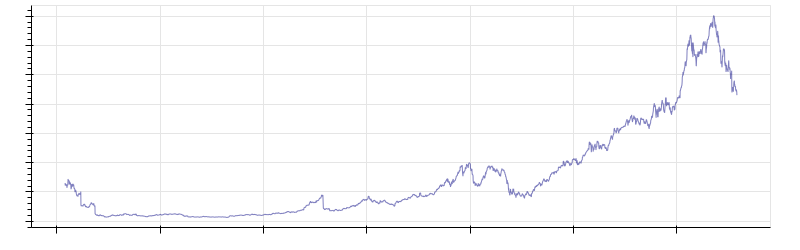

In [20]:
from IPython.display import SVG
SVG('plot.svg')

In [19]:
# EXERCISE: Save a layout of plots (e.g. row or column) as SVG and see what happens 


<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>11. Running Bokeh Applications</h2></div>

The architecture of Bokeh is such that high-level “model objects” (representing things like plots, ranges, axes, glyphs, etc.) are created in Python, and then converted to a JSON format that is consumed by the client library, BokehJS. Using the Bokeh Server, it is possible to keep the “model objects” in python and in the browser in sync with one another, creating powerful capabilities:

* respond to UI and tool events generated in a browser with computations or queries using the full power of python
* automatically push updates the UI (i.e. widgets or plots), in a browser
* use periodic, timeout, and asychronous callbacks drive streaming updates

***This capability to synchronize between python and the browser is the main purpose of the Bokeh Server.***

In [107]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

## Bokeh Apps in Notebooks

The easiest way to embed a Bokeh application in a notebook is to make a function `modify_doc(doc)` that creates Bokeh content, and adds it to the document. This function can be passed to `show`, and the app defined by the function will be displayed inline. A short complete example is below

In [108]:
from bokeh.layouts import column
from bokeh.models import TextInput, Button, Paragraph

def modify_doc(doc):
    
    # create some widgets
    button = Button(label="Say HI")
    input = TextInput(value="Bokeh")
    output = Paragraph()

    # add a callback to a widget
    def update():
        output.text = "Hello, " + input.value
    button.on_click(update)

    # create a layout for everything
    layout = column(button, input, output)

    # add the layout to curdoc
    doc.add_root(layout)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc) 

In [4]:
# EXERCISE: add a Select widget to this example that offers several different greetings



## Bokeh Apps with `bokeh serve`

It's also possible to define Bokeh applications by creating a standard Python script. In this case, there is no need to make a function like `modify_doc`. Typically, the script should simply create all the bokeh cotent, then add it to the doc with a line like
```python
curdoc().add_root(layout)
```

To try out the example below, copy the code into a file ``hello.py`` and then execute:
```bash
bokeh serve --show hello.py 
```

<center><div style="font-size: 14pt;color: firebrick;"> NOTE: The exercise below require work outside the notebook <div></center>

```python
# hello.py 

from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph

# create some widgets
button = Button(label="Say HI")
input = TextInput(value="Bokeh")
output = Paragraph()

# add a callback to a widget
def update():
    output.text = "Hello, " + input.value
button.on_click(update)

# create a layout for everything
layout = column(button, input, output)

# add the layout to curdoc
curdoc().add_root(layout)
```

Copy this code to a script `hello.py` and run it with the Bokeh server.

## Linking Plots and Widgets

Lets take a look at a more involved example that links several widgets to a plot. 

In [109]:
from numpy.random import random

from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Select, TextInput

def get_data(N):
    return dict(x=random(size=N), y=random(size=N), r=random(size=N) * 0.03)

COLORS = ["black", "firebrick", "navy", "olive", "goldenrod"]

def modify_doc(doc):
    source = ColumnDataSource(data=get_data(200))

    p = figure(tools="", toolbar_location=None)
    r = p.circle(x='x', y='y', radius='r', source=source,
                 color="navy", alpha=0.6, line_color="white")

    
    select = Select(title="Color", value="navy", options=COLORS)
    input = TextInput(title="Number of points", value="200")

    def update_color(attrname, old, new):
        r.glyph.fill_color = select.value
    select.on_change('value', update_color)

    def update_points(attrname, old, new):
        N = int(input.value)
        source.data = get_data(N)
    input.on_change('value', update_points)

    layout = column(row(select, input, width=400), row(p))

    doc.add_root(layout)

show(modify_doc)

In [6]:
# EXERCISE: add more widgets to change more aspects of this plot


# Streaming Data

It is possible to efficiently stream new data to column data sources by using the ``stream`` method. This method accepts two argmuments:
* ``new_data`` &mdash; a dictionary with the same structure as the column data source
* ``rollover`` &mdash; a maximum column length on the client (earlier data is dropped) *[optional]*

If no ``rollover`` is specified, data is never dropped on the client and columns grow without bound.

It is often useful to use periodic callbacks in conjuction with streaming data The ``add_periodic_callback`` method of ``curdoc()`` accepts a callback function, and a time interval (in ms) to repeatedly execute the callback. 


In [110]:
from math import cos, sin

from bokeh.models import ColumnDataSource

def modify_doc(doc):
    p = figure(match_aspect=True)
    p.circle(x=0, y=0, radius=1, fill_color=None, line_width=2)
    
    # this is just to help the auto-datarange
    p.rect(0, 0, 2, 2, alpha=0)

    # this is the data source we will stream to
    source = ColumnDataSource(data=dict(x=[1], y=[0]))
    p.circle(x='x', y='y', size=12, fill_color='white', source=source)

    def update():
        x, y = source.data['x'][-1], source.data['y'][-1]

        # construct the new values for all columns, and pass to stream
        new_data = dict(x=[x*cos(0.1) - y*sin(0.1)], y=[x*sin(0.1) + y*cos(0.1)])
        source.stream(new_data, rollover=8)

    doc.add_periodic_callback(update, 150)
    doc.add_root(p)
    
show(modify_doc)

In [8]:
### EXERCISE: starting with the above example, create your own streaming plot


Bokeh column data sources also support a `patch` method that can be used to efficiently update subsets of data.

## Directory Format Apps and Templates

Bokeh apps can also be defined with a directory format. This format affords the use of extra modules, data files, templates, theme files, and other features. The directory should contain a `main.py` which is the "entry point" for the app, but ay contain extra parts:
```
myapp
   |
   +---main.py
   +---server_lifecycle.py
   +---static
   +---theme.yaml
   +---templates
        +---index.html
```
The [Directory Format](https://bokeh.pydata.org/en/latest/docs/user_guide/server.html#directory-format) section of the User's Guide has more information. 

See a complete sophisticated example at: https://github.com/bokeh/bokeh/tree/master/examples/app/dash

<img src="https://blog.bokeh.org/images/release-0-13-0/dash.png">

## Tips and Tricks

   
* Real Python callbacks *require* a Bokeh server application. They cannot work with `output_file`, `components` or other functions that generate standalone output. Standalone content can only use `CustomJS` callbacks. 


* Try to update data sources "all at once" whenever possible, i.e. prefer this:
    ```python
    source.data = new_data_dict  # GOOD
    ```
    rather then updating individual columns sequentially:
    ```python
    # LESS GOOD
    source.data['foo'] = new_foo_column
    source.data['bar'] = new_bar_column 
    ```
    If the new columns are exactly the same length as the old ones, then updating sequentially, but will trigger extra updates, and may result in bad visual effects. 
    If the new columns a different length than the old ones, then updating "all at once" is **mandatory**.
   

* Each time a session is started, the Bokeh server runs the script (or `modify_doc`) function, and the code that is run ***must return completely new Bokeh objects every time***. It is not possible to share Bokeh objects between sessions. As a concrete example, this is what NOT to do:
    ```python
    source = ColumnDataSource(data)  # VERY BAD - global outside modify_doc
    
    def modify_doc(doc):
        p = figure()
        p.circle('x', 'y', source=source)
        doc.add_root(p)
    
    ```
    The analogous situation would occur with a script if the script imports a global Bokeh object from a separate module (due to the way Python caches imports).

In [111]:
<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <a href="http://bokeh.org/">     
           <img 
               src="assets/bokeh-transparent.png" 
               style="width:50px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>11. Running Bokeh Applications</h2></div>

The architecture of Bokeh is such that high-level “model objects” (representing things like plots, ranges, axes, glyphs, etc.) are created in Python, and then converted to a JSON format that is consumed by the client library, BokehJS. Using the Bokeh Server, it is possible to keep the “model objects” in python and in the browser in sync with one another, creating powerful capabilities:

* respond to UI and tool events generated in a browser with computations or queries using the full power of python
* automatically push updates the UI (i.e. widgets or plots), in a browser
* use periodic, timeout, and asychronous callbacks drive streaming updates

***This capability to synchronize between python and the browser is the main purpose of the Bokeh Server.***

from bokeh.io import output_notebook, show
output_notebook()

## Bokeh Apps in Notebooks

The easiest way to embed a Bokeh application in a notebook is to make a function `modify_doc(doc)` that creates Bokeh content, and adds it to the document. This function can be passed to `show`, and the app defined by the function will be displayed inline. A short complete example is below

from bokeh.layouts import column
from bokeh.models import TextInput, Button, Paragraph

def modify_doc(doc):
    
    # create some widgets
    button = Button(label="Say HI")
    input = TextInput(value="Bokeh")
    output = Paragraph()

    # add a callback to a widget
    def update():
        output.text = "Hello, " + input.value
    button.on_click(update)

    # create a layout for everything
    layout = column(button, input, output)

    # add the layout to curdoc
    doc.add_root(layout)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc) 

# EXERCISE: add a Select widget to this example that offers several different greetings



## Bokeh Apps with `bokeh serve`

It's also possible to define Bokeh applications by creating a standard Python script. In this case, there is no need to make a function like `modify_doc`. Typically, the script should simply create all the bokeh cotent, then add it to the doc with a line like
```python
curdoc().add_root(layout)
```

To try out the example below, copy the code into a file ``hello.py`` and then execute:
```bash
bokeh serve --show hello.py 
```

<center><div style="font-size: 14pt;color: firebrick;"> NOTE: The exercise below require work outside the notebook <div></center>

```python
# hello.py 

from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph

# create some widgets
button = Button(label="Say HI")
input = TextInput(value="Bokeh")
output = Paragraph()

# add a callback to a widget
def update():
    output.text = "Hello, " + input.value
button.on_click(update)

# create a layout for everything
layout = column(button, input, output)

# add the layout to curdoc
curdoc().add_root(layout)
```

Copy this code to a script `hello.py` and run it with the Bokeh server.

## Linking Plots and Widgets

Lets take a look at a more involved example that links several widgets to a plot. 

from numpy.random import random

from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Select, TextInput

def get_data(N):
    return dict(x=random(size=N), y=random(size=N), r=random(size=N) * 0.03)

COLORS = ["black", "firebrick", "navy", "olive", "goldenrod"]

def modify_doc(doc):
    source = ColumnDataSource(data=get_data(200))

    p = figure(tools="", toolbar_location=None)
    r = p.circle(x='x', y='y', radius='r', source=source,
                 color="navy", alpha=0.6, line_color="white")

    
    select = Select(title="Color", value="navy", options=COLORS)
    input = TextInput(title="Number of points", value="200")

    def update_color(attrname, old, new):
        r.glyph.fill_color = select.value
    select.on_change('value', update_color)

    def update_points(attrname, old, new):
        N = int(input.value)
        source.data = get_data(N)
    input.on_change('value', update_points)

    layout = column(row(select, input, width=400), row(p))

    doc.add_root(layout)

show(modify_doc)

# EXERCISE: add more widgets to change more aspects of this plot


# Streaming Data

It is possible to efficiently stream new data to column data sources by using the ``stream`` method. This method accepts two argmuments:
* ``new_data`` &mdash; a dictionary with the same structure as the column data source
* ``rollover`` &mdash; a maximum column length on the client (earlier data is dropped) *[optional]*

If no ``rollover`` is specified, data is never dropped on the client and columns grow without bound.

It is often useful to use periodic callbacks in conjuction with streaming data The ``add_periodic_callback`` method of ``curdoc()`` accepts a callback function, and a time interval (in ms) to repeatedly execute the callback. 


from math import cos, sin

from bokeh.models import ColumnDataSource

def modify_doc(doc):
    p = figure(match_aspect=True)
    p.circle(x=0, y=0, radius=1, fill_color=None, line_width=2)
    
    # this is just to help the auto-datarange
    p.rect(0, 0, 2, 2, alpha=0)

    # this is the data source we will stream to
    source = ColumnDataSource(data=dict(x=[1], y=[0]))
    p.circle(x='x', y='y', size=12, fill_color='white', source=source)

    def update():
        x, y = source.data['x'][-1], source.data['y'][-1]

        # construct the new values for all columns, and pass to stream
        new_data = dict(x=[x*cos(0.1) - y*sin(0.1)], y=[x*sin(0.1) + y*cos(0.1)])
        source.stream(new_data, rollover=8)

    doc.add_periodic_callback(update, 150)
    doc.add_root(p)
    
show(modify_doc)

### EXERCISE: starting with the above example, create your own streaming plot


Bokeh column data sources also support a `patch` method that can be used to efficiently update subsets of data.

## Directory Format Apps and Templates

Bokeh apps can also be defined with a directory format. This format affords the use of extra modules, data files, templates, theme files, and other features. The directory should contain a `main.py` which is the "entry point" for the app, but ay contain extra parts:
```
myapp
   |
   +---main.py
   +---server_lifecycle.py
   +---static
   +---theme.yaml
   +---templates
        +---index.html
```
The [Directory Format](https://bokeh.pydata.org/en/latest/docs/user_guide/server.html#directory-format) section of the User's Guide has more information. 

See a complete sophisticated example at: https://github.com/bokeh/bokeh/tree/master/examples/app/dash

<img src="https://blog.bokeh.org/images/release-0-13-0/dash.png">

## Tips and Tricks

   
* Real Python callbacks *require* a Bokeh server application. They cannot work with `output_file`, `components` or other functions that generate standalone output. Standalone content can only use `CustomJS` callbacks. 


* Try to update data sources "all at once" whenever possible, i.e. prefer this:
    ```python
    source.data = new_data_dict  # GOOD
    ```
    rather then updating individual columns sequentially:
    ```python
    # LESS GOOD
    source.data['foo'] = new_foo_column
    source.data['bar'] = new_bar_column 
    ```
    If the new columns are exactly the same length as the old ones, then updating sequentially, but will trigger extra updates, and may result in bad visual effects. 
    If the new columns a different length than the old ones, then updating "all at once" is **mandatory**.
   

* Each time a session is started, the Bokeh server runs the script (or `modify_doc`) function, and the code that is run ***must return completely new Bokeh objects every time***. It is not possible to share Bokeh objects between sessions. As a concrete example, this is what NOT to do:
    ```python
    source = ColumnDataSource(data)  # VERY BAD - global outside modify_doc
    
    def modify_doc(doc):
        p = figure()
        p.circle('x', 'y', source=source)
        doc.add_root(p)
    
    ```
    The analogous situation would occur with a script if the script imports a global Bokeh object from a separate module (due to the way Python caches imports).

SyntaxError: invalid syntax (<ipython-input-111-b7c04012fb22>, line 1)